<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Fundamentos de Matemática
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Vetorização;</li>
  <li>Arrays Numpy;</li>
  <li>Operações.</li>
</ol>

---

# **Exercícios**

## 1\. Tráfego de São Paulo

Neste exercício, vamos analisar dados de mobilidade urbana da cidade de São Paulo. A base de dados está neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/traffic.csv) e é uma copia do dado original, presente neste [link](https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil). A base de dados contem a quantidade de acidentes ocorridos na cidade entre 14/12/09 e 18/12/09, das 07:00h ás 20:00h, agregados em intervalos de 30 minutos.

In [1]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/traffic.csv" -O traffic.csv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('traffic.csv', sep=';')

In [4]:
df.head()

,hour,bus_stoped,broken_truck,vehicle_excess,accident_victim,running_over,fire_vehicles,occurrence_freight,incident__dangerous_freight,lack_electricity,fire,flooding,manifestations,defect_trolleybuses,tree_road,semaphore_off,intermittent_emaphore,slowness_traffic_%
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


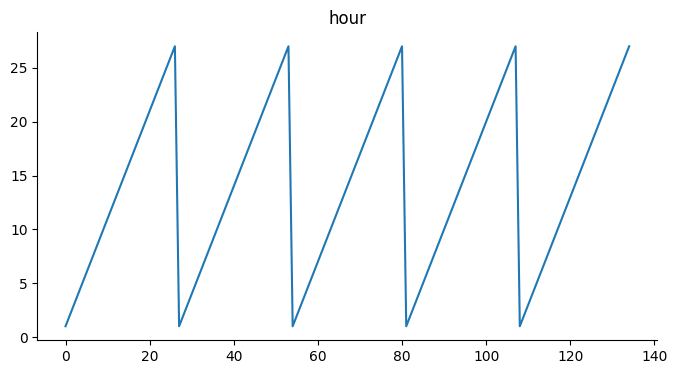

In [8]:
# @title hour

from matplotlib import pyplot as plt
df['hour'].plot(kind='line', figsize=(8, 4), title='hour')
plt.gca().spines[['top', 'right']].set_visible(False)

- **Exemplo**:

O código abaixo extrai a 13ª linha do arquivo que representa a 14ª meia hora do dia 14/12/09, contadas a partir das 07:00h, ou seja, todos os incidentes ocorridos na cidade no dia em questão entre as 13:30h e 14:00h. Vemos, por exemplo, que dois ônibus e dois caminhões ficaram paradados nas ruas da cidade, atrapalhando o tráfego.

In [7]:
df.iloc[[13]]

,hour,bus_stoped,broken_truck,vehicle_excess,accident_victim,running_over,fire_vehicles,occurrence_freight,incident__dangerous_freight,lack_electricity,fire,flooding,manifestations,defect_trolleybuses,tree_road,semaphore_off,intermittent_emaphore,slowness_traffic_%
13,14,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"4,9"


### **1.1. Nativo**

Neste primeira atividade, você deve ler o código abaixo implementado em Python nativo e responder a seguinte pergunta:

> O que o código abaixo computa?

**Resposta**:
O código retorna o número total de incidentes nos dias 14, 15, 16, 17 e 18

# -- read
data = None: Inicializa a variável data como None.
with open(file='traffic.csv', mode='r', encoding='utf8') as fp: Abre o arquivo traffic.csv no modo de leitura com codificação UTF-8.
fp.readline(): Lê a primeira linha do arquivo (normalmente, o cabeçalho) e a descarta.
data = fp.read(): Lê o restante do arquivo e armazena na variável data.

#-- analytics
day = 14: Define o dia inicial como 14.
incidents = 0: Inicializa o contador de incidentes como 0.
incident_by_day = dict(): Cria um dicionário vazio para armazenar os incidentes por dia.
Para cada linha (ou intervalo de tempo) em data:

timebox_data = timebox.split(sep=';'): Divide a linha em partes separadas por ; e armazena em timebox_data.
Dentro do loop de timebox_data:

for incident in timebox_data[1: len(timebox_data)-1]: Itera pelos incidentes listados na linha, ignorando a primeira e a última coluna.
incidents = incidents + int(incident): Converte cada incidente em inteiro e acumula em incidents.
Depois do loop de incidentes:

try: half_hour = int(timebox_data[0]): Tenta converter o primeiro elemento de timebox_data (o tempo em meia-horas) para um inteiro.

if half_hour == 27: Se for a 27ª meia-hora do dia (ou seja, 13:30 - 14:00):

incident_by_day[day] = incidents: Armazena o total de incidentes acumulados para o dia no dicionário incident_by_day.
day = day + 1: Avança para o próximo dia.
incidents = 0: Reseta o contador de incidentes.
except ValueError: continue: Ignora a linha se o valor não puder ser convertido para um inteiro.

#-- results
Para cada dia no dicionário incident_by_day:

print(f'{day}: {incident_by_day[day]}'): Imprime o dia e o número total de incidentes acumulados para aquele dia.


Resumo:
Este código lê um arquivo CSV que contém dados de tráfego, ignora a primeira linha (provavelmente um cabeçalho), e calcula o número total de incidentes para cada dia a partir das 13:30h até as 14:00h. O resultado é armazenado em um dicionário e, finalmente, os resultados são impressos.


In [9]:
import numpy as np

# -- read
data = None
with open(file='traffic.csv', mode='r', encoding='utf8') as fp:
    fp.readline()
    data = fp.read()

# -- analytics
day = 14
incidents = 0
incident_by_day = dict()

for timebox in data.split(sep='\n'):

    timebox_data = timebox.split(sep=';')

    # Verifica se há valores antes de criar o array
    if not timebox_data[1:len(timebox_data)-1]:
        continue  # Pula linhas vazias

    # -- Computação vetorial corrigida
    incident_array = np.array(timebox_data[1:len(timebox_data)-1], dtype=int)
    incidents += np.sum(incident_array)  # Agora acumulamos corretamente os valores

    try:
        half_hour = int(timebox_data[0])
        if half_hour == 27:
            incident_by_day[day] = incidents
            day += 1
            incidents = 0
    except ValueError:
        continue

# -- results (Agora está fora do loop principal)
for day in incident_by_day:
    print(f'{day}: {incident_by_day[day]}')

14: 16
15: 63
16: 94
17: 82
18: 85


### **1.2. NumPy**

Substitua o trecho do código do algoritmo que utiliza da **computação escalar** por um que utiliza da **computação vetorial**. Use o pacote NumPy.

In [11]:
import numpy as np

# -- read
data = None
with open(file='traffic.csv', mode='r', encoding='utf8') as fp:
    fp.readline()
    data = fp.read()

# -- analytics
day = 14
incidents = 0
incident_by_day = dict()

for timebox in data.split(sep='\n'):

    timebox_data = timebox.split(sep=';')

    # Verifica se há valores antes de criar o array
    if not timebox_data[1:len(timebox_data)-1]:
        continue  # Pula linhas vazias

    # -- Computação vetorial corrigida
    incident_array = np.array(timebox_data[1:len(timebox_data)-1], dtype=int)
    incidents += np.sum(incident_array)  # Agora acumulamos corretamente os valores

    try:
        half_hour = int(timebox_data[0])
        if half_hour == 27:
            incident_by_day[day] = incidents
            day += 1
            incidents = 0
    except ValueError:
        continue

# -- results (Agora está fora do loop principal)
for day in incident_by_day:
    print(f'{day}: {incident_by_day[day]}')

14: 16
15: 63
16: 94
17: 82
18: 85


Notas:  
Computação Escalar
Na computação escalar, as operações são realizadas em um único valor de dado de cada vez. Este é o modelo tradicional de computação, onde cada instrução processa um único par de operandos (por exemplo, dois números). A computação escalar é geralmente implementada em unidades de processamento central (CPUs) que possuem uma arquitetura de tipo Von Neumann, onde uma instrução é buscada, decodificada e executada em sequência.

Características da Computação Escalar:
Processamento de Dados: Realiza operações em um único valor de dado por vez.
Arquitetura: Baseada na arquitetura Von Neumann.
Uso: Comum em tarefas que não envolvem grandes quantidades de dados paralelos.
Exemplo: Processamento de um número de cada vez em um loop for.




Computação vetorial
refere-se a uma forma de processamento de dados que utiliza instruções vetoriais para realizar operações sobre vetores ou arrays de dados. Isso é especialmente útil em aplicações que envolvem processamento em larga escala de dados, como gráficos computacionais, simulações científicas, análise de dados, inteligência artificial, entre outros.

Aqui estão alguns pontos importantes sobre a computação vetorial:

Vetores e Arrays: Em vez de operar em dados individuais, a computação vetorial trabalha com conjuntos de dados (vetores ou arrays), permitindo a realização de operações paralelas.

Instruções SIMD: SIMD (Single Instruction, Multiple Data) é uma arquitetura de computação paralela utilizada na computação vetorial. Ela permite que uma única instrução seja aplicada simultaneamente a múltiplos dados. Processadores modernos, como os da série Intel e ARM, incluem extensões SIMD como SSE (Streaming SIMD Extensions), AVX (Advanced Vector Extensions), e NEON (para ARM).

Desempenho: A computação vetorial pode aumentar significativamente o desempenho em tarefas que podem ser paralelizadas, pois reduz o número de ciclos de clock necessários para processar um grande volume de dados.

Aplicações:

Gráficos Computacionais: Renderização de imagens e vídeos, onde operações matemáticas complexas são aplicadas a cada pixel ou vértice.
Ciências e Engenharia: Simulações físicas e químicas, onde grandes quantidades de dados precisam ser processadas simultaneamente.
Aprendizado de Máquina: Treinamento de modelos que requerem operações matemáticas intensivas sobre grandes conjuntos de dados.
Linguagens e Bibliotecas:

Linguagens: Algumas linguagens de programação oferecem suporte direto para operações vetoriais, como C++ (com bibliotecas como Eigen ou Armadillo) e Python (com bibliotecas como NumPy).
Bibliotecas: Além das mencionadas, outras bibliotecas especializadas em computação vetorial incluem OpenCL, CUDA (para GPUs), e BLAS (Basic Linear Algebra Subprograms).
A computação vetorial é um campo fundamental na computação moderna, permitindo o processamento eficiente de grandes volumes de dados e sendo essencial para muitas aplicações avançadas

---